In [61]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
files = [cv2.imread(f'../samples/{filename}') for filename in os.listdir('../samples') if filename.endswith('jpg')]


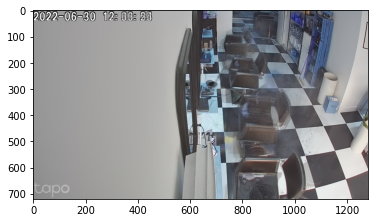

In [63]:
plt.imshow(np.mean(files, axis = 0)/255.)

In [64]:
background = np.mean(files, axis = 0, dtype=int)

In [65]:
mask = np.sum((files[0] - np.mean(files, axis = 0, dtype=int))**2, axis=2)**(1/2.) <18.


In [66]:
mat = np.zeros_like(files[0], dtype=bool)

for i in range(files[0].shape[0]):
    for j in range(files[0].shape[1]):
        mat[i,j,:] = mask[i,j]




In [67]:
files[0].shape
test = files[0]

In [68]:
test.shape

(720, 1280, 3)

In [69]:
test[mat] = 255

In [70]:
mat

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

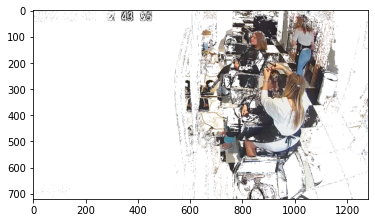

In [71]:
plt.imshow(test[...,::-1])

In [72]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [73]:


import itertools
def some_func(img, background):
    mask = np.sum((img - background)**2, axis=2)**(1/2.) <18.
    mat = np.zeros_like(img, dtype=bool)

    for i, j in itertools.product(range(files[0].shape[0]), range(files[0].shape[1])):
        mat[i,j,:] = mask[i,j]
    img[mat] = 255

    return img[...,::-1]

    

In [74]:
imgs_without_bg = [some_func(file, background) for file in files]

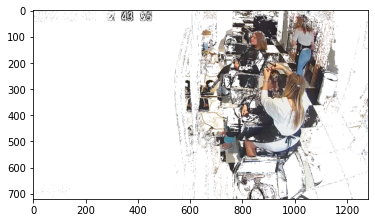

In [76]:
plt.imshow(imgs_without_bg[0])

(720, 1280, 3)

In [79]:
frame = imgs_without_bg[0]

HOGCV = cv2.HOGDescriptor()
HOGCV.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
boxes, weights = HOGCV.detectMultiScale(frame, winStride = (4, 4), padding = (8, 8), scale = 1.03)

boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

for (xA, yA, xB, yB) in boxes:
    # display the detected boxes in the colour picture
    cv2.rectangle(frame, (xA, yA), (xB, yB),
                    (0, 255, 0), 2)

#plt.imshow(frame)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Layout of the output array img is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'img'
>  - Layout of the output array img is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'img'


In [80]:
boxes

array([[1061,  187, 1133,  331],
       [ 549,  250,  630,  411],
       [1005,  285, 1078,  431],
       [ 849,  273,  917,  408],
       [1151,  510, 1220,  647],
       [ 867,  282,  989,  526],
       [ 951,    0, 1133,  349]], dtype=int32)

In [82]:
from deepface import DeepFace

In [83]:
DeepFace.analyze(frame)

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]


ValueError: ('Confirm that opencv is installed on your environment! Expected path ', '/Users/g0bel1n/opt/anaconda3/envs/deep-hair-env/lib/python3.10/site-packages/data/haarcascade_frontalface_default.xml', ' violated.')